# Sandesh Pokharel  
### Course: Advanced Big Data and Data Mining (MSCS-634)  
### Assignment 2: Lab 1 - Data Visualization, Data Preprocessing, and Statistical Analysis Using Python  

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data.csv")

# Display the first five rows
df.head()

,ProductID,Category,UnitsSold,UnitPrice,Revenue,Region
0,101,Electronics,20,399.99,7999.80,East
1,102,Clothing,35,29.99,1049.65,West
2,103,Clothing,12,49.99,599.88,West
3,104,Electronics,5,499.99,2499.95,North
4,105,Groceries,100,3.99,399.00,South


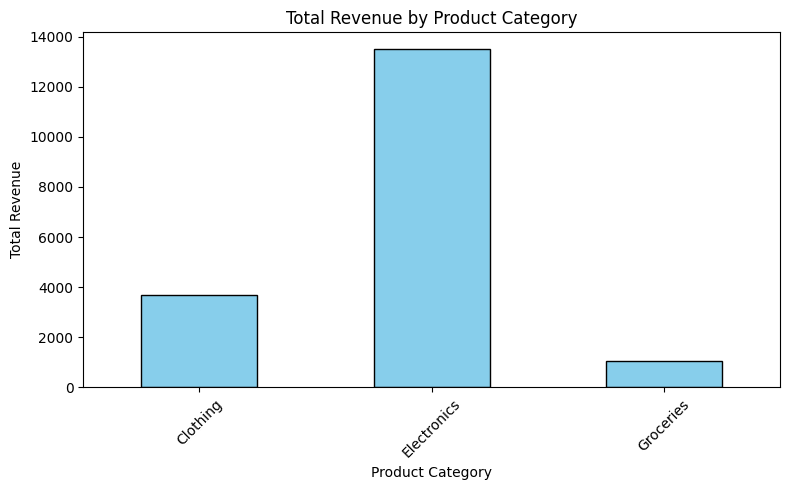

In [5]:
import matplotlib.pyplot as plt

# Group by Category and sum the revenue
category_revenue = df.groupby('Category')['Revenue'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
### Insight: Bar Chart – Total Revenue by Product Category

This bar chart shows the total revenue generated by each product category.  
- **Electronics** clearly outperforms all other categories, with the highest revenue.  
- **Clothing** ranks second, while **Groceries** contribute the least.  

This insight is useful for identifying which product lines are driving the most sales.

SyntaxError: invalid syntax (3861085413.py, line 3)

### Insight: Bar Chart – Total Revenue by Product Category

This bar chart shows the total revenue generated by each product category.  
- **Electronics** clearly outperforms all other categories, with the highest revenue.  
- **Clothing** ranks second, while **Groceries** contribute the least.  

This insight is useful for identifying which product lines are driving the most sales.

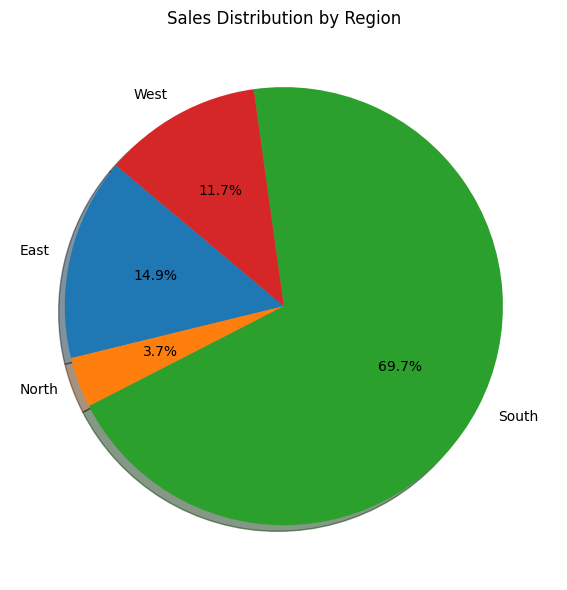

In [7]:
# Group by Region and sum the UnitsSold
region_sales = df.groupby('Region')['UnitsSold'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)

plt.title('Sales Distribution by Region')
plt.ylabel('')  # Hides the y-axis label
plt.tight_layout()
plt.show()

### Insight: Pie Chart – Sales Distribution by Region

This pie chart shows the proportion of total units sold in each region.  
It helps visualize where most of the product sales activity is occurring.  
Regions with larger segments indicate stronger sales presence, which may suggest higher demand or market penetration.

In [8]:
# Check for missing values in each column
df.isnull().sum()

ProductID    0
Category     0
UnitsSold    0
UnitPrice    0
Revenue      0
Region       0
dtype: int64

In [9]:
# Simulate missing values in 'UnitsSold' and 'Region'
df.loc[1, 'UnitsSold'] = None
df.loc[3, 'Region'] = None

# Show dataset with missing values (screenshot this)
df

,ProductID,Category,UnitsSold,UnitPrice,Revenue,Region
0,101,Electronics,20.0,399.99,7999.80,East
1,102,Clothing,NaN,29.99,1049.65,West
2,103,Clothing,12.0,49.99,599.88,West
3,104,Electronics,5.0,499.99,2499.95,None
4,105,Groceries,100.0,3.99,399.00,South
5,106,Groceries,85.0,2.49,211.65,South
6,107,Clothing,22.0,59.99,1319.78,East
7,108,Electronics,10.0,299.99,2999.90,North
8,109,Groceries,95.0,4.49,426.55,South
9,110,Clothing,18.0,39.99,719.82,East


In [10]:
# Fill missing numeric value with mean
df['UnitsSold'].fillna(df['UnitsSold'].mean(), inplace=True)

# Fill missing categorical value with mode
df['Region'].fillna(df['Region'].mode()[0], inplace=True)

# Show updated dataset (screenshot this too)
df

/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_91721/781268429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UnitsSold'].fillna(df['UnitsSold'].mean(), inplace=True)
/var/folders/bx/n0b8n8wd0ss985_pj3z33n780000gn/T/ipykernel_91721/781268429.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

,ProductID,Category,UnitsSold,UnitPrice,Revenue,Region
0,101,Electronics,20.000000,399.99,7999.80,East
1,102,Clothing,40.777778,29.99,1049.65,West
2,103,Clothing,12.000000,49.99,599.88,West
3,104,Electronics,5.000000,499.99,2499.95,East
4,105,Groceries,100.000000,3.99,399.00,South
5,106,Groceries,85.000000,2.49,211.65,South
6,107,Clothing,22.000000,59.99,1319.78,East
7,108,Electronics,10.000000,299.99,2999.90,North
8,109,Groceries,95.000000,4.49,426.55,South
9,110,Clothing,18.000000,39.99,719.82,East


In [11]:
# Step 1: Calculate Q1, Q3 and IQR
Q1 = df['UnitsSold'].quantile(0.25)
Q3 = df['UnitsSold'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Step 3: Identify outliers
outliers = df[(df['UnitsSold'] < lower_bound) | (df['UnitsSold'] > upper_bound)]
print("\nDetected Outliers in 'UnitsSold':")
print(outliers)

Q1: 13.5, Q3: 73.94444444444444, IQR: 60.44444444444444
Lower Bound: -77.16666666666666, Upper Bound: 164.6111111111111

Detected Outliers in 'UnitsSold':
Empty DataFrame
Columns: [ProductID, Category, UnitsSold, UnitPrice, Revenue, Region]
Index: []


In [12]:
# Remove rows that are outliers (just for demonstration)
df_no_outliers = df[(df['UnitsSold'] >= lower_bound) & (df['UnitsSold'] <= upper_bound)]

# Display cleaned dataset
df_no_outliers

,ProductID,Category,UnitsSold,UnitPrice,Revenue,Region
0,101,Electronics,20.000000,399.99,7999.80,East
1,102,Clothing,40.777778,29.99,1049.65,West
2,103,Clothing,12.000000,49.99,599.88,West
3,104,Electronics,5.000000,499.99,2499.95,East
4,105,Groceries,100.000000,3.99,399.00,South
5,106,Groceries,85.000000,2.49,211.65,South
6,107,Clothing,22.000000,59.99,1319.78,East
7,108,Electronics,10.000000,299.99,2999.90,North
8,109,Groceries,95.000000,4.49,426.55,South
9,110,Clothing,18.000000,39.99,719.82,East


In [13]:
# Part 1: Random Sampling (50% of the data)
sampled_df = df_no_outliers.sample(frac=0.5, random_state=1)

# Part 2: Drop the 'ProductID' column (assuming it's not needed)
reduced_df = sampled_df.drop(columns=['ProductID'])

# Display reduced dataset
reduced_df

,Category,UnitsSold,UnitPrice,Revenue,Region
2,Clothing,12.0,49.99,599.88,West
9,Clothing,18.0,39.99,719.82,East
6,Clothing,22.0,59.99,1319.78,East
4,Groceries,100.0,3.99,399.00,South
0,Electronics,20.0,399.99,7999.80,East


In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Copy the reduced DataFrame to preserve original
scaled_df = reduced_df.copy()

# 1. Min-Max Scaling for 'UnitPrice'
scaler = MinMaxScaler()
scaled_df['UnitPrice_Scaled'] = scaler.fit_transform(scaled_df[['UnitPrice']])

# 2. Discretization of 'UnitsSold' into 3 bins
scaled_df['UnitsSold_Category'] = pd.cut(scaled_df['UnitsSold'],
                                         bins=3,
                                         labels=['Low', 'Medium', 'High'])

# Display updated DataFrame
scaled_df

ModuleNotFoundError: No module named 'sklearn'

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Copy the reduced DataFrame to preserve original
scaled_df = reduced_df.copy()

# 1. Min-Max Scaling for 'UnitPrice'
scaler = MinMaxScaler()
scaled_df['UnitPrice_Scaled'] = scaler.fit_transform(scaled_df[['UnitPrice']])

# 2. Discretization of 'UnitsSold' into 3 bins
scaled_df['UnitsSold_Category'] = pd.cut(scaled_df['UnitsSold'],
                                         bins=3,
                                         labels=['Low', 'Medium', 'High'])

# Display updated DataFrame
scaled_df

,Category,UnitsSold,UnitPrice,Revenue,Region,UnitPrice_Scaled,UnitsSold_Category
2,Clothing,12.0,49.99,599.88,West,0.116162,Low
9,Clothing,18.0,39.99,719.82,East,0.090909,Low
6,Clothing,22.0,59.99,1319.78,East,0.141414,Low
4,Groceries,100.0,3.99,399.00,South,0.000000,High
0,Electronics,20.0,399.99,7999.80,East,1.000000,Low


In [16]:
# General info about dataset
print("=== Dataset Info ===")
scaled_df.info()

# Statistical summary of numerical columns
print("\n=== Statistical Summary ===")
scaled_df.describe()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 0
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Category            5 non-null      object  
 1   UnitsSold           5 non-null      float64 
 2   UnitPrice           5 non-null      float64 
 3   Revenue             5 non-null      float64 
 4   Region              5 non-null      object  
 5   UnitPrice_Scaled    5 non-null      float64 
 6   UnitsSold_Category  5 non-null      category
dtypes: category(1), float64(4), object(2)
memory usage: 417.0+ bytes

=== Statistical Summary ===


,UnitsSold,UnitPrice,Revenue,UnitPrice_Scaled
count,5.000000,5.000000,5.000000,5.000000
mean,34.400000,110.790000,2207.656000,0.269697
std,36.861904,163.043552,3256.036397,0.411726
min,12.000000,3.990000,399.000000,0.000000
25%,18.000000,39.990000,599.880000,0.090909
50%,20.000000,49.990000,719.820000,0.116162
75%,22.000000,59.990000,1319.780000,0.141414
max,100.000000,399.990000,7999.800000,1.000000


In [17]:
# Central Tendency Measures
print("=== Central Tendency Measures ===")

# Mean
print("\nMean:\n", scaled_df.mean(numeric_only=True))

# Median
print("\nMedian:\n", scaled_df.median(numeric_only=True))

# Mode
print("\nMode:\n", scaled_df.mode(numeric_only=True).iloc[0])  # First mode row

# Minimum
print("\nMinimum:\n", scaled_df.min(numeric_only=True))

# Maximum
print("\nMaximum:\n", scaled_df.max(numeric_only=True))

=== Central Tendency Measures ===

Mean:
 UnitsSold             34.400000
UnitPrice            110.790000
Revenue             2207.656000
UnitPrice_Scaled       0.269697
dtype: float64

Median:
 UnitsSold            20.000000
UnitPrice            49.990000
Revenue             719.820000
UnitPrice_Scaled      0.116162
dtype: float64

Mode:
 UnitsSold            12.00
UnitPrice             3.99
Revenue             399.00
UnitPrice_Scaled      0.00
Name: 0, dtype: float64

Minimum:
 UnitsSold            12.00
UnitPrice             3.99
Revenue             399.00
UnitPrice_Scaled      0.00
dtype: float64

Maximum:
 UnitsSold            100.00
UnitPrice            399.99
Revenue             7999.80
UnitPrice_Scaled       1.00
dtype: float64


In [18]:
# Dispersion Measures
print("=== Dispersion Measures ===")

# Standard Deviation
print("\nStandard Deviation:\n", scaled_df.std(numeric_only=True))

# Variance
print("\nVariance:\n", scaled_df.var(numeric_only=True))

# Range = Max - Min
range_vals = scaled_df.max(numeric_only=True) - scaled_df.min(numeric_only=True)
print("\nRange:\n", range_vals)

=== Dispersion Measures ===

Standard Deviation:
 UnitsSold             36.861904
UnitPrice            163.043552
Revenue             3256.036397
UnitPrice_Scaled       0.411726
dtype: float64

Variance:
 UnitsSold           1.358800e+03
UnitPrice           2.658320e+04
Revenue             1.060177e+07
UnitPrice_Scaled    1.695184e-01
dtype: float64

Range:
 UnitsSold             88.0
UnitPrice            396.0
Revenue             7600.8
UnitPrice_Scaled       1.0
dtype: float64


In [19]:
# Correlation and Covariance
print("=== Correlation Matrix ===")
print(scaled_df.corr(numeric_only=True))

print("\n=== Covariance Matrix ===")
print(scaled_df.cov(numeric_only=True))

=== Correlation Matrix ===
                  UnitsSold  UnitPrice   Revenue  UnitPrice_Scaled
UnitsSold          1.000000  -0.333505 -0.272093         -0.333505
UnitPrice         -0.333505   1.000000  0.996678          1.000000
Revenue           -0.272093   0.996678  1.000000          0.996678
UnitPrice_Scaled  -0.333505   1.000000  0.996678          1.000000

=== Covariance Matrix ===
                     UnitsSold      UnitPrice       Revenue  UnitPrice_Scaled
UnitsSold          1358.800000   -2004.400000 -3.265759e+04         -5.061616
UnitPrice         -2004.400000   26583.200000  5.291120e+05         67.129293
Revenue          -32657.588000  529112.044000  1.060177e+07       1336.141525
UnitPrice_Scaled     -5.061616      67.129293  1.336142e+03          0.169518


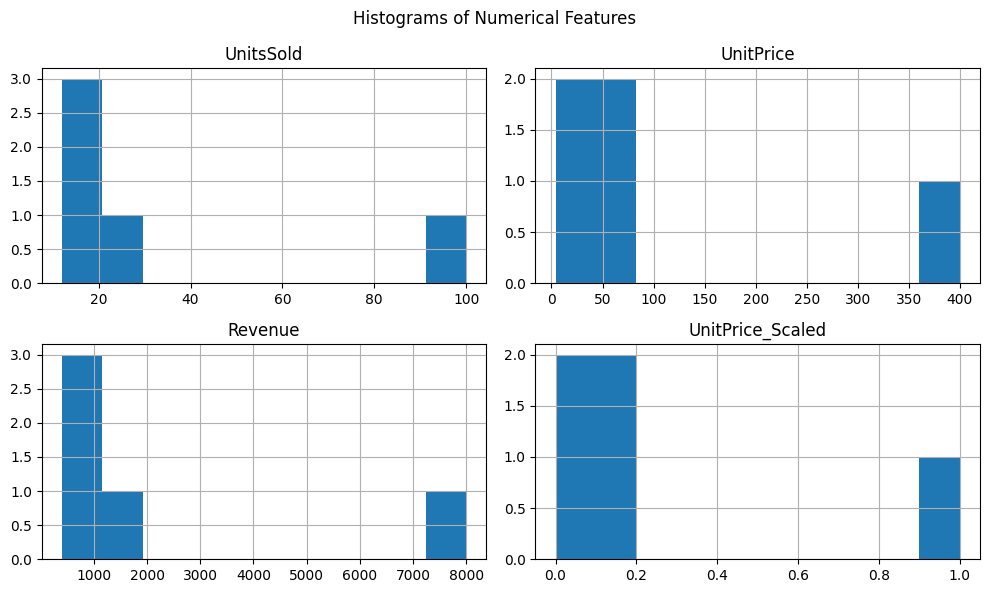

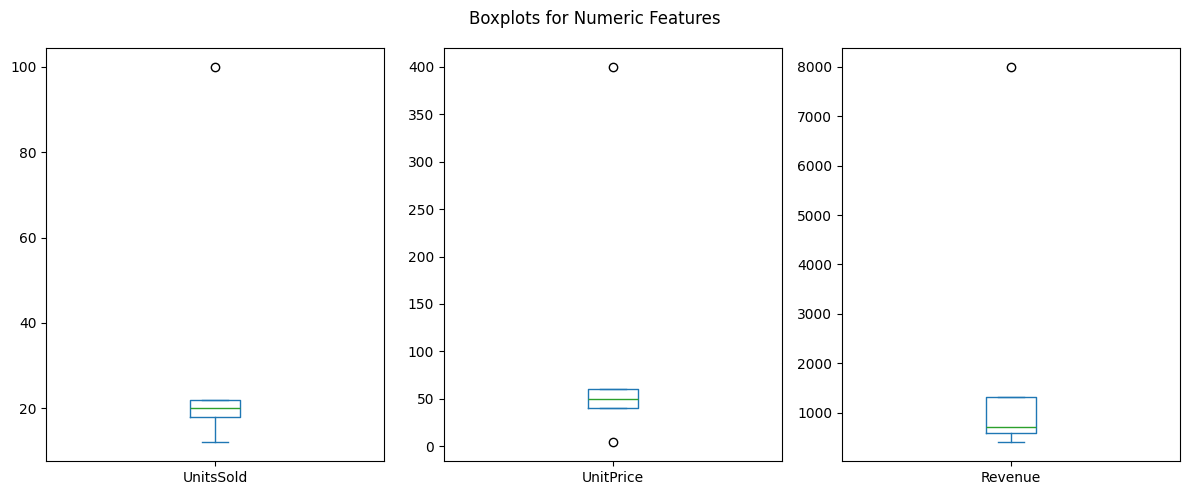

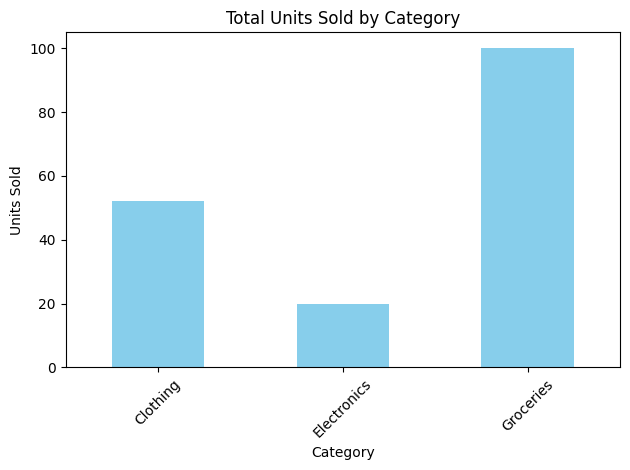

In [20]:
import matplotlib.pyplot as plt

# 1. Histograms
scaled_df.hist(figsize=(10, 6))
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# 2. Boxplots
scaled_df[['UnitsSold', 'UnitPrice', 'Revenue']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 5))
plt.suptitle("Boxplots for Numeric Features")
plt.tight_layout()
plt.show()

# 3. Bar chart of UnitsSold by Category
scaled_df.groupby('Category')['UnitsSold'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Units Sold by Category")
plt.ylabel("Units Sold")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()